# Data Understanding

## Sumber Data & Referensi

Dataset yang digunakan dalam penelitian ini bersumber dari UCR Computational Entomology Group, Universitas California, Riverside. Data ini dipublikasikan sebagai bagian dari penelitian oleh Chen et al. (2014) dengan judul "Flying Insect Classification with Inexpensive Sensors".  
- **Jenis Data**: Time-Series (Deret Waktu)  
- **Format**: Nilai intensitas cahaya (amplitudo) per satuan waktu.  
- **Domain**: Pseudo-Acoustic (Sinyal optik yang menyerupai sinyal suara).  

## Mekanisme Pengambilan Data (Sensor Optik)

Berbeda dengan penelitian bioakustik konvensional yang menggunakan mikrofon, data ini direkam menggunakan Sensor Optik Inframerah.

- **Prinsip Kerja** (Optical Occlusion): Alat perekam terdiri dari emitor laser inframerah dan penerima (phototransistor). Saat nyamuk atau lalat terbang melintasi sensor, kepakan sayapnya akan memotong/menghalangi sinar laser tersebut secara berulang-ulang.

- **Modulasi Amplitudo**: Bayangan sayap yang memotong sinar laser menyebabkan fluktuasi intensitas cahaya yang diterima sensor. Fluktuasi ini direkam sebagai sinyal elektronik.

- **Pseudo-Acoustic**: Sinyal elektronik akan direkam dengan MP3 recorder digital,  Sinyal yang dihasilkan murni berasal dari gerakan fisik sayap, bukan dari tekanan udara (suara). Oleh karena itu, data ini disebut pseudo-acoustic karena bentuk gelombangnya mirip suara, namun bebas dari noise lingkungan (seperti suara kendaraan, angin, atau percakapan manusia) yang biasanya mengganggu mikrofon.

Untuk detail pembuatan dataset ada:  
Jurnal: https://app.jove.com/t/52111/flying-insect-detection-and-classification-with-inexpensive-sensors  
Video Youtube: https://youtu.be/Aw40IlXaRow?si=aN1TaKhk_REP6R-K


## Spesifikasi Teknis Data
Setiap instans data merepresentasikan satu kejadian "lewatnya serangga" di depan sensor. Berikut detail teknisnya:
- **Sampling Rate**: 6.000 Hz (6 kHz). Artinya, sensor mencatat 6.000 titik data per detik.Durasi Sinyal: 100 milidetik (0.1 detik). Durasi ini sangat singkat, hanya cukup untuk menangkap sekitar 2-6 kali kepakan sayap penuh (tergantung spesies).
- **Dimensi Data**: Setiap baris data terdiri dari 600 titik data ($6000 \text{ Hz} \times 0.01 \text{ s} = 600$).

Karena Perinstan Data Suara serangga ada 600 titik data maka per titik data diambil dalam waktu 0.167 milidetik

In [1]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data, meta = arff.loadarff('./InsectSound/InsectSound_TRAIN.arff')
df = pd.DataFrame(data)

df['target'] = df['target'].str.decode('utf-8')

df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att592,att593,att594,att595,att596,att597,att598,att599,att600,target
0,0.000153,-6.578439e-05,0.000038,-0.000029,0.000020,-0.000006,0.000004,0.000002,0.000003,-0.000003,...,-0.000003,0.000010,-0.000006,-0.000006,-0.000010,0.000011,-4.337056e-07,0.000013,-0.000024,Aedes_female
1,-0.000029,6.673935e-07,0.000035,-0.000119,-0.000141,-0.000131,-0.000251,-0.000253,-0.000261,-0.000309,...,0.001548,0.001509,0.001564,0.001499,0.001487,0.001473,1.498447e-03,0.001388,0.001597,Aedes_female
2,-0.019499,4.194278e-02,0.192660,0.232282,0.132188,0.013040,-0.035715,-0.066381,-0.070153,-0.050134,...,0.087443,0.234516,0.242373,0.130852,0.042257,-0.005834,-7.398573e-02,-0.047510,-0.037126,Aedes_female
3,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,Aedes_female
4,0.000023,-7.772223e-05,0.000111,-0.000096,0.000043,0.000023,-0.000083,0.000119,-0.000104,0.000058,...,-0.000201,-0.000108,-0.000037,0.000045,0.000112,0.000165,2.464727e-04,0.000267,0.000361,Aedes_female


In [2]:
df['target'].unique()

array(['Aedes_female', 'Aedes_male', 'Fruit_flies', 'House_flies',
       'Quinx_female', 'Quinx_male', 'Stigma_female', 'Stigma_male',
       'Tarsalis_female', 'Tarsalis_male'], dtype=object)

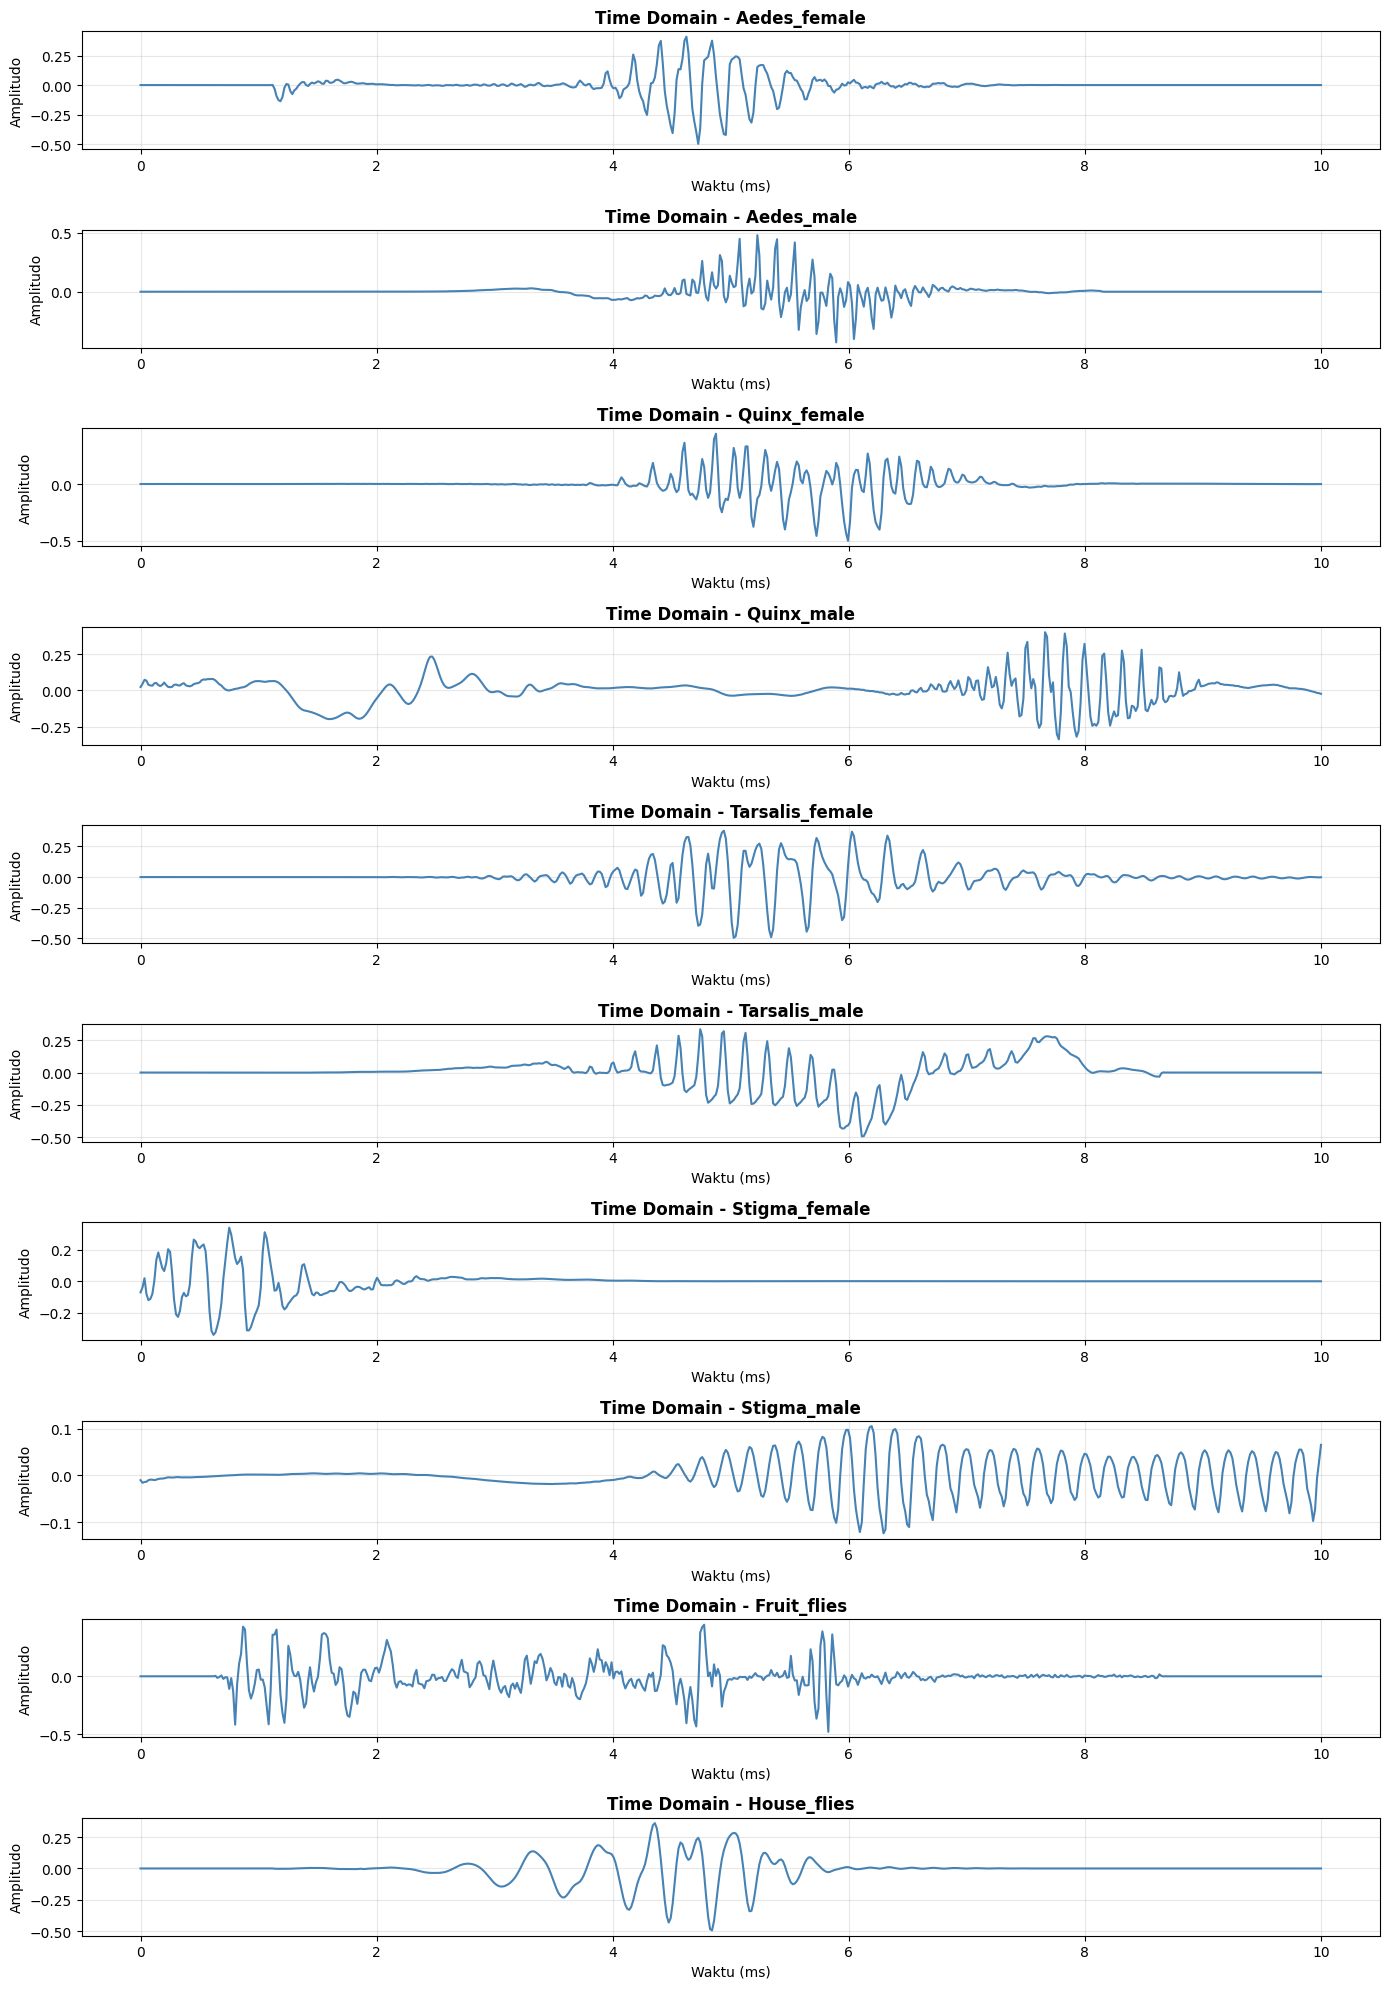

In [3]:
## Time Domain Plot - Contoh Sinyal Beberapa Spesies

# Ambil satu contoh dari beberapa spesies
species_to_plot = ['Aedes_female', 'Aedes_male', 'Quinx_female', 'Quinx_male', 'Tarsalis_female', 
'Tarsalis_male', 'Stigma_female', 'Stigma_male', 'Fruit_flies', 'House_flies']

fig, axes = plt.subplots(len(species_to_plot), 1, figsize=(14, 20))

for idx, species in enumerate(species_to_plot):
    # Ambil sampel pertama dari setiap spesies
    sample_data = df[df['target'] == species].iloc[100, :-1].values
    
    # Buat time axis (dalam milidetik)
    time_axis = np.linspace(0, 10, len(sample_data))  # 0-10 ms untuk 600 data points
    
    axes[idx].plot(time_axis, sample_data, linewidth=1.5, color='steelblue')
    axes[idx].set_title(f'Time Domain - {species}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Waktu (ms)')
    axes[idx].set_ylabel('Amplitudo')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Frequency Domain Analysis - FFT (Fast Fourier Transform)

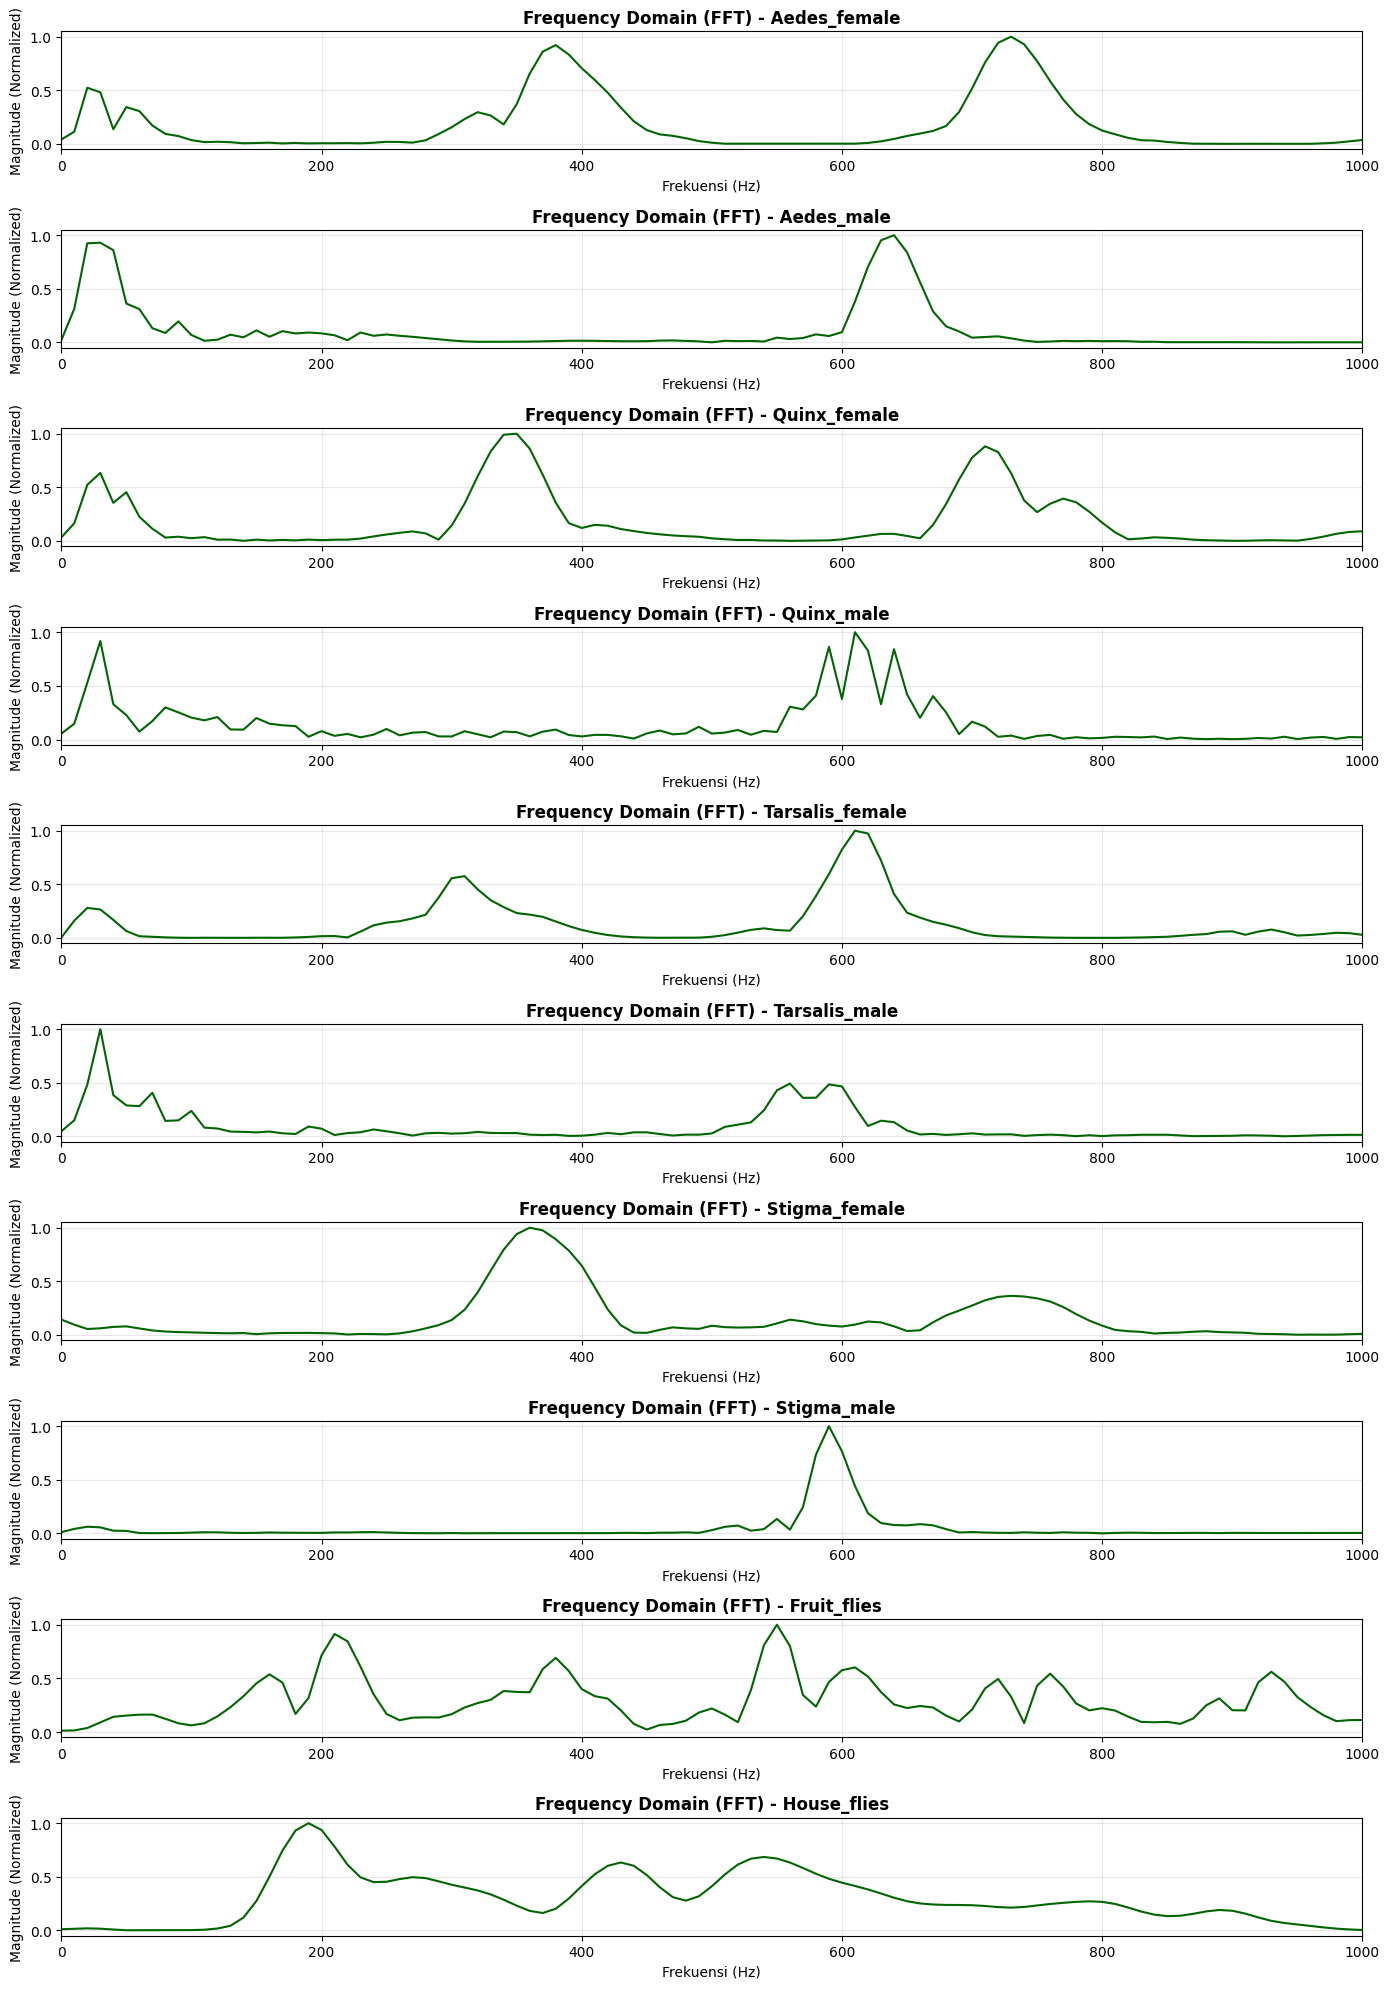

In [4]:
# Parameter teknis
sampling_rate = 6000  # Hz
duration = 0.01  # detik (10 ms)
num_samples = 600

# Buat frequency axis
frequencies = np.fft.fftfreq(num_samples, d=1/sampling_rate)[:num_samples//2]

# Ambil sampel dari beberapa spesies
species_to_plot = ['Aedes_female', 'Aedes_male', 'Quinx_female', 'Quinx_male', 'Tarsalis_female', 
'Tarsalis_male', 'Stigma_female', 'Stigma_male', 'Fruit_flies', 'House_flies']

fig, axes = plt.subplots(len(species_to_plot), 1, figsize=(14, 20))

for idx, species in enumerate(species_to_plot):
    # Ambil sampel pertama dari setiap spesies
    sample_data = df[df['target'] == species].iloc[3, :-1].values.astype(float)
    
    # Hitung FFT (Fast Fourier Transform)
    fft_values = np.fft.fft(sample_data)
    magnitude_spectrum = np.abs(fft_values)[:num_samples//2]
    
    # Normalisasi
    magnitude_spectrum = magnitude_spectrum / np.max(magnitude_spectrum)
    
    # Plot
    axes[idx].plot(frequencies, magnitude_spectrum, linewidth=1.5, color='darkgreen')
    axes[idx].set_title(f'Frequency Domain (FFT) - {species}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Frekuensi (Hz)')
    axes[idx].set_ylabel('Magnitude (Normalized)')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xlim(0, 1000)  # Fokus pada frekuensi 0-1000 Hz (bagian utama sinyal)

plt.tight_layout()
plt.show()

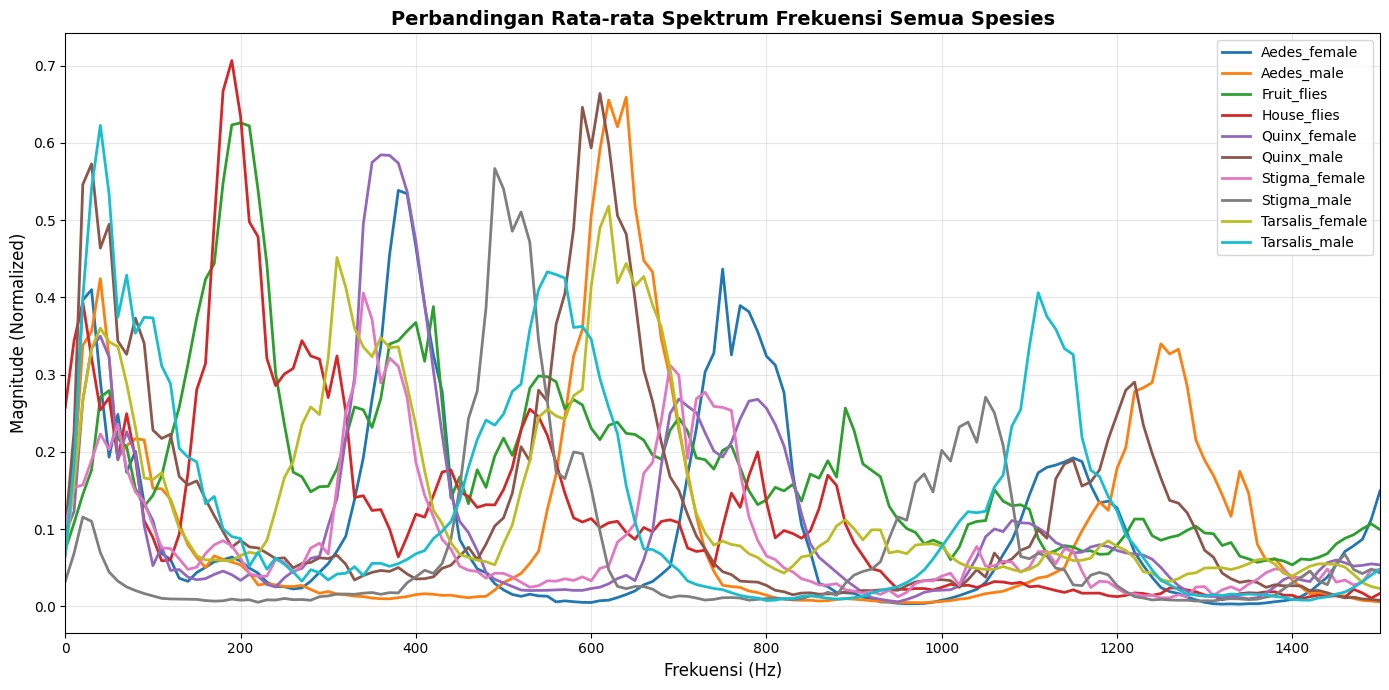


 Insights dari Frequency Domain:
   • Spektrum frekuensi menunjukkan karakteristik unik kepakan sayap setiap spesies
   • Perbedaan frekuensi dominan membantu membedakan antar spesies
   • Fruit Flies dan House Flies memiliki pola frekuensi yang berbeda dari nyamuk


In [5]:
# Perbandingan Rata-rata Spektrum Frekuensi untuk Semua Spesies
fig, ax = plt.subplots(figsize=(14, 7))

colors_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for idx, species in enumerate(df['target'].unique()):
    # Hitung rata-rata spektrum untuk setiap spesies
    species_samples = df[df['target'] == species].iloc[:, :-1].values.astype(float)
    
    # Hitung FFT untuk semua sampel dan ambil rata-ratanya
    fft_magnitudes = []
    for sample in species_samples[:10]:  # Gunakan 10 sampel pertama untuk efisiensi
        fft_values = np.fft.fft(sample)
        magnitude = np.abs(fft_values)[:num_samples//2]
        magnitude = magnitude / np.max(magnitude)
        fft_magnitudes.append(magnitude)
    
    avg_magnitude = np.mean(fft_magnitudes, axis=0)
    
    ax.plot(frequencies, avg_magnitude, label=species, linewidth=2, color=colors_palette[idx])

ax.set_title('Perbandingan Rata-rata Spektrum Frekuensi Semua Spesies', fontsize=14, fontweight='bold')
ax.set_xlabel('Frekuensi (Hz)', fontsize=12)
ax.set_ylabel('Magnitude (Normalized)', fontsize=12)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 1500)

plt.tight_layout()
plt.show()

print("\n Insights dari Frequency Domain:")
print("   • Spektrum frekuensi menunjukkan karakteristik unik kepakan sayap setiap spesies")
print("   • Perbedaan frekuensi dominan membantu membedakan antar spesies")
print("   • Fruit Flies dan House Flies memiliki pola frekuensi yang berbeda dari nyamuk")

## Ringkasan Statistik Data

In [6]:
# Informasi Umum Dataset
print("="*80)
print("INFORMASI UMUM DATASET")
print("="*80)
print(f"\n Dimensi Data:")
print(f"   • Total Baris (Sampel): {df.shape[0]:,}")
print(f"   • Total Kolom (Fitur + Target): {df.shape[1]}")
print(f"   • Jumlah Fitur Time Series: {df.shape[1] - 1}")

print(f"\n Jumlah Kelas:")
class_counts = df['target'].value_counts().sort_values(ascending=False)
for label, count in class_counts.items():
    print(f"   • {label}: {count:,} sampel")

print(f"\n Tipe Data:")
print(f"   • Fitur: {df.iloc[:, :-1].dtypes.unique()[0]}")
print(f"   • Target: {df['target'].dtype}")

print(f"\nMissing Values:")
print(f"Total nilai kosong: {df.isnull().sum().sum()}")
print(f"Status: {' Data lengkap' if df.isnull().sum().sum() == 0 else 'Ada nilai kosong'}")

INFORMASI UMUM DATASET

 Dimensi Data:
   • Total Baris (Sampel): 25,000
   • Total Kolom (Fitur + Target): 601
   • Jumlah Fitur Time Series: 600

 Jumlah Kelas:
   • Aedes_female: 2,500 sampel
   • Aedes_male: 2,500 sampel
   • Fruit_flies: 2,500 sampel
   • House_flies: 2,500 sampel
   • Quinx_female: 2,500 sampel
   • Quinx_male: 2,500 sampel
   • Stigma_female: 2,500 sampel
   • Stigma_male: 2,500 sampel
   • Tarsalis_female: 2,500 sampel
   • Tarsalis_male: 2,500 sampel

 Tipe Data:
   • Fitur: float64
   • Target: object

Missing Values:
Total nilai kosong: 0
Status:  Data lengkap


In [7]:
# Analisis Statistik Deskriptif
print("\n" + "="*80)
print("STATISTIK DESKRIPTIF SINYAL")
print("="*80)

# Hitung statistik untuk setiap fitur
signal_features = df.iloc[:, :-1].astype(float)

stats = {
    'Min': signal_features.min().min(),
    'Max': signal_features.max().max(),
    'Mean': signal_features.mean().mean(),
    'Std': signal_features.std().mean(),
    'Q1 (25%)': signal_features.quantile(0.25).mean(),
    'Median (50%)': signal_features.median().mean(),
    'Q3 (75%)': signal_features.quantile(0.75).mean()
}

print("\n Statistik Agregat Semua Sinyal:")
for stat_name, stat_value in stats.items():
    print(f"   • {stat_name}: {stat_value:.6f}")

# Analisis per kelas
print("\n Statistik Per Kelas:")
print("\n{:<20} {:<12} {:<12} {:<12}".format("Kelas", "Mean", "Std Dev", "Max Amplitude"))
print("-" * 56)

for label in df['target'].unique():
    class_data = df[df['target'] == label].iloc[:, :-1].astype(float)
    mean_val = class_data.mean().mean()
    std_val = class_data.std().mean()
    max_val = class_data.max().max()
    print("{:<20} {:<12.6f} {:<12.6f} {:<12.6f}".format(label, mean_val, std_val, max_val))


STATISTIK DESKRIPTIF SINYAL

 Statistik Agregat Semua Sinyal:
   • Min: -0.627218
   • Max: 0.622156
   • Mean: -0.000306
   • Std: 0.093588
   • Q1 (25%): -0.021188
   • Median (50%): 0.000035
   • Q3 (75%): 0.020665

 Statistik Per Kelas:

Kelas                Mean         Std Dev      Max Amplitude
--------------------------------------------------------
Aedes_female         -0.000862    0.092253     0.552242    
Aedes_male           -0.000651    0.083548     0.543439    
Fruit_flies          0.000101     0.095400     0.545201    
House_flies          -0.000281    0.089546     0.541944    
Quinx_female         -0.000549    0.096680     0.622156    
Quinx_male           -0.000275    0.082105     0.596989    
Stigma_female        -0.000928    0.115045     0.594136    
Stigma_male          0.000268     0.106537     0.586131    
Tarsalis_female      0.000439     0.081466     0.509389    
Tarsalis_male        -0.000323    0.082095     0.590772    


## Distribusi Kelas dan Keseimbangan Data

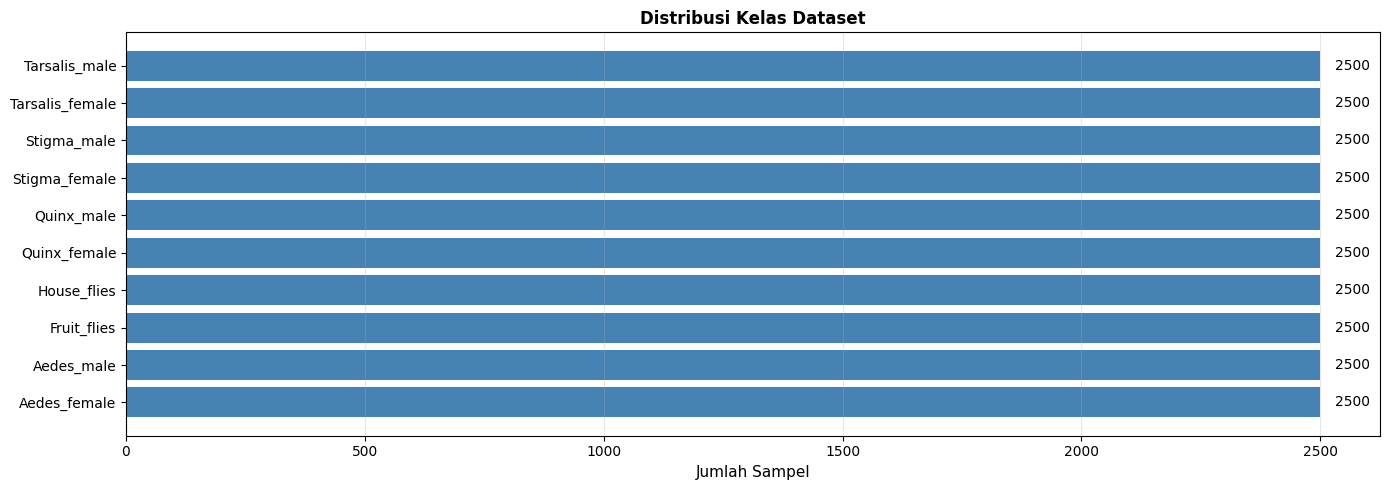


ANALISIS KESEIMBANGAN KELAS

 Dataset Status: SEIMBANG (Balanced)

 Analisis Keseimbangan:
   • Total Sampel: 25,000
   • Total Kelas: 10
   • Sampel Ideal per Kelas: 2500
   • Rata-rata Sampel per Kelas: 2500
   • Standar Deviasi: 0.00


In [8]:
# Visualisasi Distribusi Kelas
fig, axes = plt.subplots(1, 1, figsize=(14, 5))

# Bar Plot
class_counts = df['target'].value_counts().sort_values(ascending=False)
axes.barh(class_counts.index, class_counts.values, color='steelblue')
axes.set_xlabel('Jumlah Sampel', fontsize=11)
axes.set_title('Distribusi Kelas Dataset', fontsize=12, fontweight='bold')
axes.grid(axis='x', alpha=0.3)

# Tambah nilai di atas bar
for i, v in enumerate(class_counts.values):
    axes.text(v + 30, i, str(v), va='center', fontsize=10)
plt.tight_layout()
plt.show()

# Analisis Keseimbangan
print("\n" + "="*80)
print("ANALISIS KESEIMBANGAN KELAS")
print("="*80)
total_samples = len(df)
expected_per_class = total_samples / df['target'].nunique()

print(f"\n Dataset Status: {'SEIMBANG (Balanced)' if class_counts.std() < 1 else 'TIDAK SEIMBANG (Imbalanced)'}")
print(f"\n Analisis Keseimbangan:")
print(f"   • Total Sampel: {total_samples:,}")
print(f"   • Total Kelas: {df['target'].nunique()}")
print(f"   • Sampel Ideal per Kelas: {expected_per_class:.0f}")
print(f"   • Rata-rata Sampel per Kelas: {class_counts.mean():.0f}")
print(f"   • Standar Deviasi: {class_counts.std():.2f}")

## Analisis Karakteristik Sinyal Per Spesies

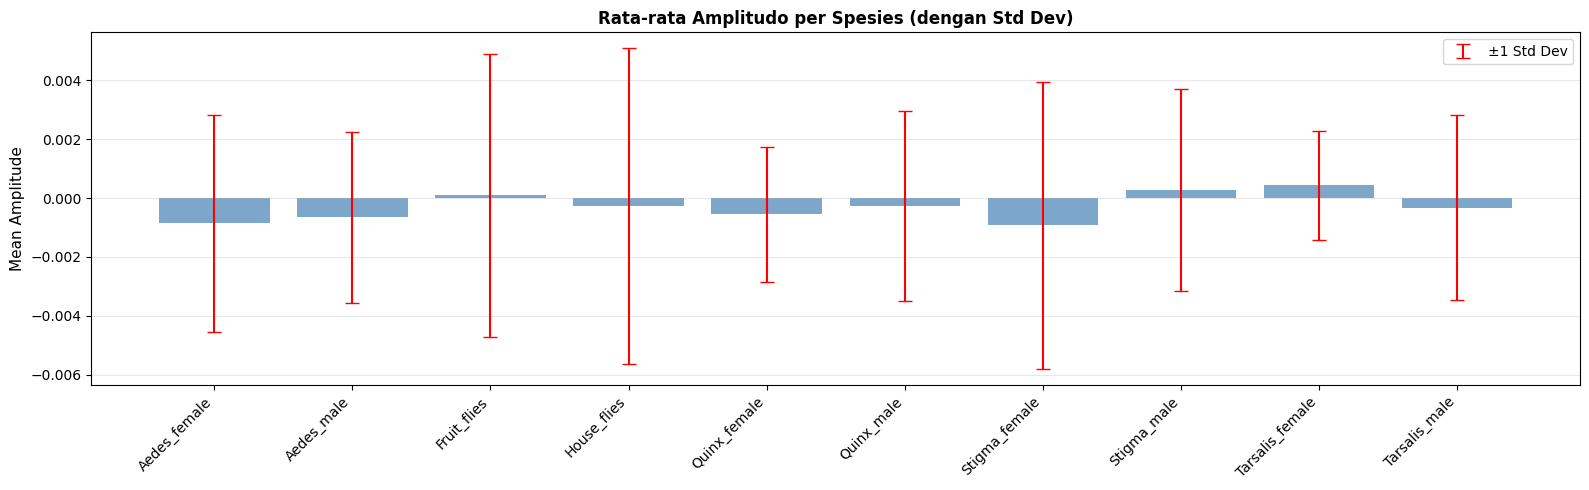


KARAKTERISTIK ENERGI SINYAL PER SPESIES

Spesies              Mean Amp        RMS Energy     
--------------------------------------------------


NameError: name 'energies' is not defined

In [9]:
# Boxplot Amplitudo per Kelas
fig, axes = plt.subplots(1, 1, figsize=(16, 5))

# Hitung statistik per kelas
signal_data = df.iloc[:, :-1].astype(float)
signal_data['target'] = df['target']

# Mean Amplitude per kelas
mean_amplitudes = []
std_amplitudes = []
class_labels = []

for label in sorted(df['target'].unique()):
    class_signals = df[df['target'] == label].iloc[:, :-1].astype(float)
    mean_amp = class_signals.values.mean(axis=1).mean()
    std_amp = class_signals.values.mean(axis=1).std()
    mean_amplitudes.append(mean_amp)
    std_amplitudes.append(std_amp)
    class_labels.append(label)

# Plot 1: Mean Amplitude dengan error bar
axes.bar(range(len(class_labels)), mean_amplitudes, color='steelblue', alpha=0.7)
axes.errorbar(range(len(class_labels)), mean_amplitudes, yerr=std_amplitudes, 
                 fmt='none', color='red', capsize=5, label='±1 Std Dev')
axes.set_xticks(range(len(class_labels)))
axes.set_xticklabels(class_labels, rotation=45, ha='right')
axes.set_ylabel('Mean Amplitude', fontsize=11)
axes.set_title('Rata-rata Amplitudo per Spesies (dengan Std Dev)', fontsize=12, fontweight='bold')
axes.grid(axis='y', alpha=0.3)
axes.legend()


plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("KARAKTERISTIK ENERGI SINYAL PER SPESIES")
print("="*80)
print("\n{:<20} {:<15} {:<15}".format("Spesies", "Mean Amp", "RMS Energy"))
print("-" * 50)
for i, label in enumerate(sorted(df['target'].unique())):
    print("{:<20} {:<15.6f} {:<15.6f}".format(label, mean_amplitudes[i], energies[i]))